# **Minimal Example with TensorFlow**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation

In [2]:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
noise = xs - np.random.uniform(-1, 1, (observations, 1))

generated_inputs = np.column_stack((xs, zs))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF Intro', inputs = generated_inputs, targets= generated_targets)

## Solving with TensorFlow

In [5]:
training_data = np.load('TF Intro.npz')
input_size = 2
output_size = 1

In [17]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                  kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                  bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')

In [18]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1 )

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 126.8975
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0683
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5480
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4657
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3942
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4179
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3871
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4193
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3802
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4252
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3981
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3739
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4054
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4072
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3478
E

## Extract the weights and bias

In [19]:
model.layers[0].get_weights()

[array([[ 2.9921603],
        [-3.0232048]], dtype=float32),
 array([4.9936657], dtype=float32)]

In [14]:
model.layers[0].get_weights()[0]

array([[ 3.0017402],
       [-3.0756974]], dtype=float32)

In [15]:
model.layers[0].get_weights()[1]

array([4.9774528], dtype=float32)

## Exctract the outputs

In [20]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-37. ],
       [-16.8],
       [ 41.9],
       [ 12.2],
       [-39.3],
       [-24.8],
       [  3.1],
       [ 27.9],
       [ 35.2],
       [  8.7],
       [-12.2],
       [ -6.1],
       [ 17.1],
       [-38.9],
       [ 26.9],
       [  5.7],
       [-19.4],
       [ 26.3],
       [-30.1],
       [ 29.7],
       [  7.8],
       [ -7.4],
       [-14.9],
       [ 11.4],
       [ 48.2],
       [-12.6],
       [-14. ],
       [ 33.6],
       [-49.3],
       [ 30.2],
       [ -8.7],
       [ 42.7],
       [ 52.8],
       [-44.8],
       [  8.1],
       [  2.1],
       [-19.3],
       [  3.1],
       [-30.3],
       [  7.8],
       [  9.4],
       [-24.4],
       [ 12. ],
       [ 17.6],
       [-30.6],
       [ 10. ],
       [-31.4],
       [ 37.3],
       [ 40.7],
       [ -7. ],
       [ 31.2],
       [-29.7],
       [-13. ],
       [ 23.2],
       [-26.7],
       [-21.9],
       [ 17.1],
       [ 26.5],
       [  5.9],
       [-29. ],
       [ 19.9],
       [ 22.5],
       [

In [21]:
training_data['targets'].round(1)

array([[-37.6],
       [-17.4],
       [ 42.6],
       [ 13. ],
       [-38.8],
       [-24.3],
       [  3.4],
       [ 28.2],
       [ 35.3],
       [  9.5],
       [-12.7],
       [ -7.1],
       [ 17.3],
       [-39.4],
       [ 26.9],
       [  6. ],
       [-19.5],
       [ 26.6],
       [-29.3],
       [ 28.8],
       [  7. ],
       [ -7.2],
       [-15.1],
       [ 10.5],
       [ 47.4],
       [-12.2],
       [-13.6],
       [ 34.5],
       [-49.5],
       [ 30.5],
       [ -9.5],
       [ 42.5],
       [ 52.2],
       [-43.8],
       [  8.6],
       [  2.1],
       [-20. ],
       [  3. ],
       [-29.3],
       [  8.7],
       [  9.1],
       [-24.8],
       [ 12.7],
       [ 16.9],
       [-30.8],
       [ 10.1],
       [-31.8],
       [ 37.7],
       [ 40.3],
       [ -6.3],
       [ 31.9],
       [-30.2],
       [-13.8],
       [ 23.8],
       [-25.6],
       [-21.1],
       [ 17.4],
       [ 26.5],
       [  5.1],
       [-28.9],
       [ 19.8],
       [ 21.9],
       [

## Plotting the data

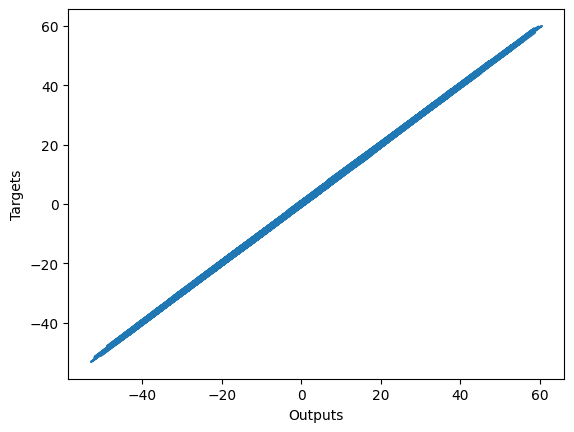

In [23]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()